In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import numpy as np

In [12]:
noscemus_metadata = pd.read_csv("https://raw.githubusercontent.com/CCS-ZCU/noscemus_ETF/refs/heads/master/data/metadata_table_long.csv")
#noscemus_metadata.head(5)

In [13]:
# max/min year
max_y = max(noscemus_metadata["file_year"])
min_y = min(noscemus_metadata["file_year"])
print(min_y, max_y)
noscemus_subset = noscemus_metadata[noscemus_metadata["file_year"].between(min_y, 1800)]
print(len(noscemus_subset))

1472.0 1932.0
907


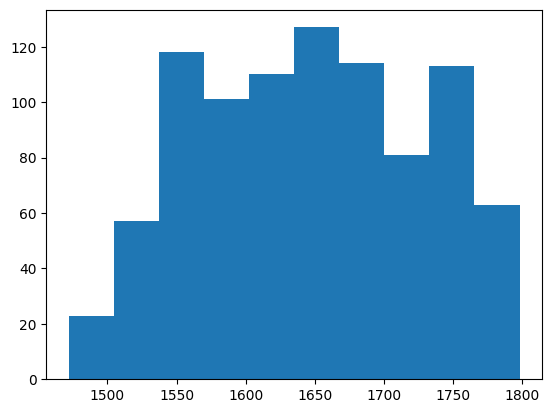

In [14]:
x = np.random.normal(170, 10, 250)
plt.hist(noscemus_subset["file_year"])
plt.show()

In [15]:
#print(noscemus_metadata.columns)
relevant_coulmns =['Author', 'Full title', 'In', 'Year', 'Place', 'Publisher/Printer', 'Discipline/Content', 'Cited in', 'Library and Signature', 'ids', 'date_min', 'date_max']

In [16]:
metadata_subset= noscemus_metadata[relevant_coulmns]
#metadata_subset.head()
#metadata_subset.to_excel('place_meta.xlsx')

In [17]:
# separate places
noscemus_metadata['Place'] = noscemus_metadata['Place'].str.split(',')
noscemus_metadata = noscemus_metadata.explode('Place').reset_index(drop=True)

noscemus_metadata.head()

,Author,Full title,In,Year,Place,Publisher/Printer,Era,Form/Genre,Discipline/Content,Original,...,Of interest to,Transkribus text available,Written by,Library and Signature,ids,id,date_min,date_max,filename,file_year
0,"Achrelius, Daniel",Scientiarum magnes recitatus publice anno 1690...,NaN,1690,[Turku],Wall,17th century,Oration,"Mathematics, Astronomy/Astrology/Cosmography, ...",Scientiarum magnes(Google Books),...,"MK, JL",Yes,IT,NaN,[705665],705665,1690.0,1690.0,"Achrelius,_Daniel_-_Scientiarum_magnes__Turku_...",1690.0
1,"Acidalius, Valens","Ad Iordanum Brunum Nolanum, Italum","Poematum Iani Lernutii, Iani Gulielmi, Valenti...",1603,Liegnitz,"Albert, David",17th century,Panegyric poem,Astronomy/Astrology/Cosmography,Ad Iordanum Brunum (1603)(CAMENA)Ad Iordanum B...,...,"MK, IT",Yes,MK,NaN,[801745],801745,1603.0,1603.0,Janus_Lernutius_et_al__-_Poemata__Liegnitz_160...,1603.0
2,"Acidalius, Valens","Ad Iordanum Brunum Nolanum, Italum","Poematum Iani Lernutii, Iani Gulielmi, Valenti...",1603,Wrocław,"Albert, David",17th century,Panegyric poem,Astronomy/Astrology/Cosmography,Ad Iordanum Brunum (1603)(CAMENA)Ad Iordanum B...,...,"MK, IT",Yes,MK,NaN,[801745],801745,1603.0,1603.0,Janus_Lernutius_et_al__-_Poemata__Liegnitz_160...,1603.0
3,"Acosta, José de",De natura novi orbis libri duo et De promulgat...,NaN,1589,Salamanca,Guillelum Foquel,16th century,Monograph,"Astronomy/Astrology/Cosmography, Geography/Car...",De natura novi orbis(Biodiversity Heritage Lib...,...,DB,Yes,DB,NaN,[713323],713323,1589.0,1589.0,"Acosta,_José_de_-_De_natura_novi_orbis__Salama...",1589.0
4,"Adam, Melchior","Vitae Germanorum medicorum, qui saeculo superi...",NaN,1620,Heidelberg,"Rosa, Geyder",17th century,Biography,Medicine,Vitae Germanorum medicorum(MDZ)Alternative lin...,...,IT,Yes,IT,NaN,[693148],693148,1620.0,1620.0,"Adam,_Melchior_-_Vitae_Germanorum_medicorum__H...",1620.0


In [18]:
# separate disciplines
all_disc = set(noscemus_metadata['Discipline/Content'].to_string().replace('Earth sciences', 'Earth-sciences').replace('/', ' ').replace(',', ' ').split())
all_disc = [x for x in all_disc if not  (x.isnumeric() or '(' in x or '.' in x or ')' in x)]
all_disc.append('ids')
print(all_disc)

# group by discipline
split_disc = pd.DataFrame(columns=all_disc)
for index, row in noscemus_metadata.iterrows():
    for d in all_disc[::-1]:
        if d in str(row['Discipline/Content']):
            split_disc.loc[index, d] = 0
            split_disc.loc[index, 'ids'] = row['ids']
        else:
            split_disc.loc[index, d] = 1
            split_disc.loc[index, 'ids'] = row['ids']


split_disc.head()

['Geography', 'NaN', 'Chemistry', 'Cartography', 'Other', 'Medicine', 'Astronomy', 'Meteorology', 'Astrology', 'Mathematics', 'Earth-sciences', 'Physics', 'Biology', 'Alchemy', 'Cosmography', 'Earth', 'ids']


,Geography,NaN,Chemistry,Cartography,Other,Medicine,Astronomy,Meteorology,Astrology,Mathematics,Earth-sciences,Physics,Biology,Alchemy,Cosmography,Earth,ids
0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,[705665]
1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,[801745]
2,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,[801745]
3,0,1,1,0,1,1,0,0,0,1,1,1,1,1,0,0,[713323]
4,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,[693148]


In [19]:
#merge dfs
res_df = noscemus_metadata.merge(split_disc, how = "left", on = "ids", copy = False).drop_duplicates()
res_df = res_df.drop(columns=['Discipline/Content'])

# save
res_df.to_csv("res_df.csv")

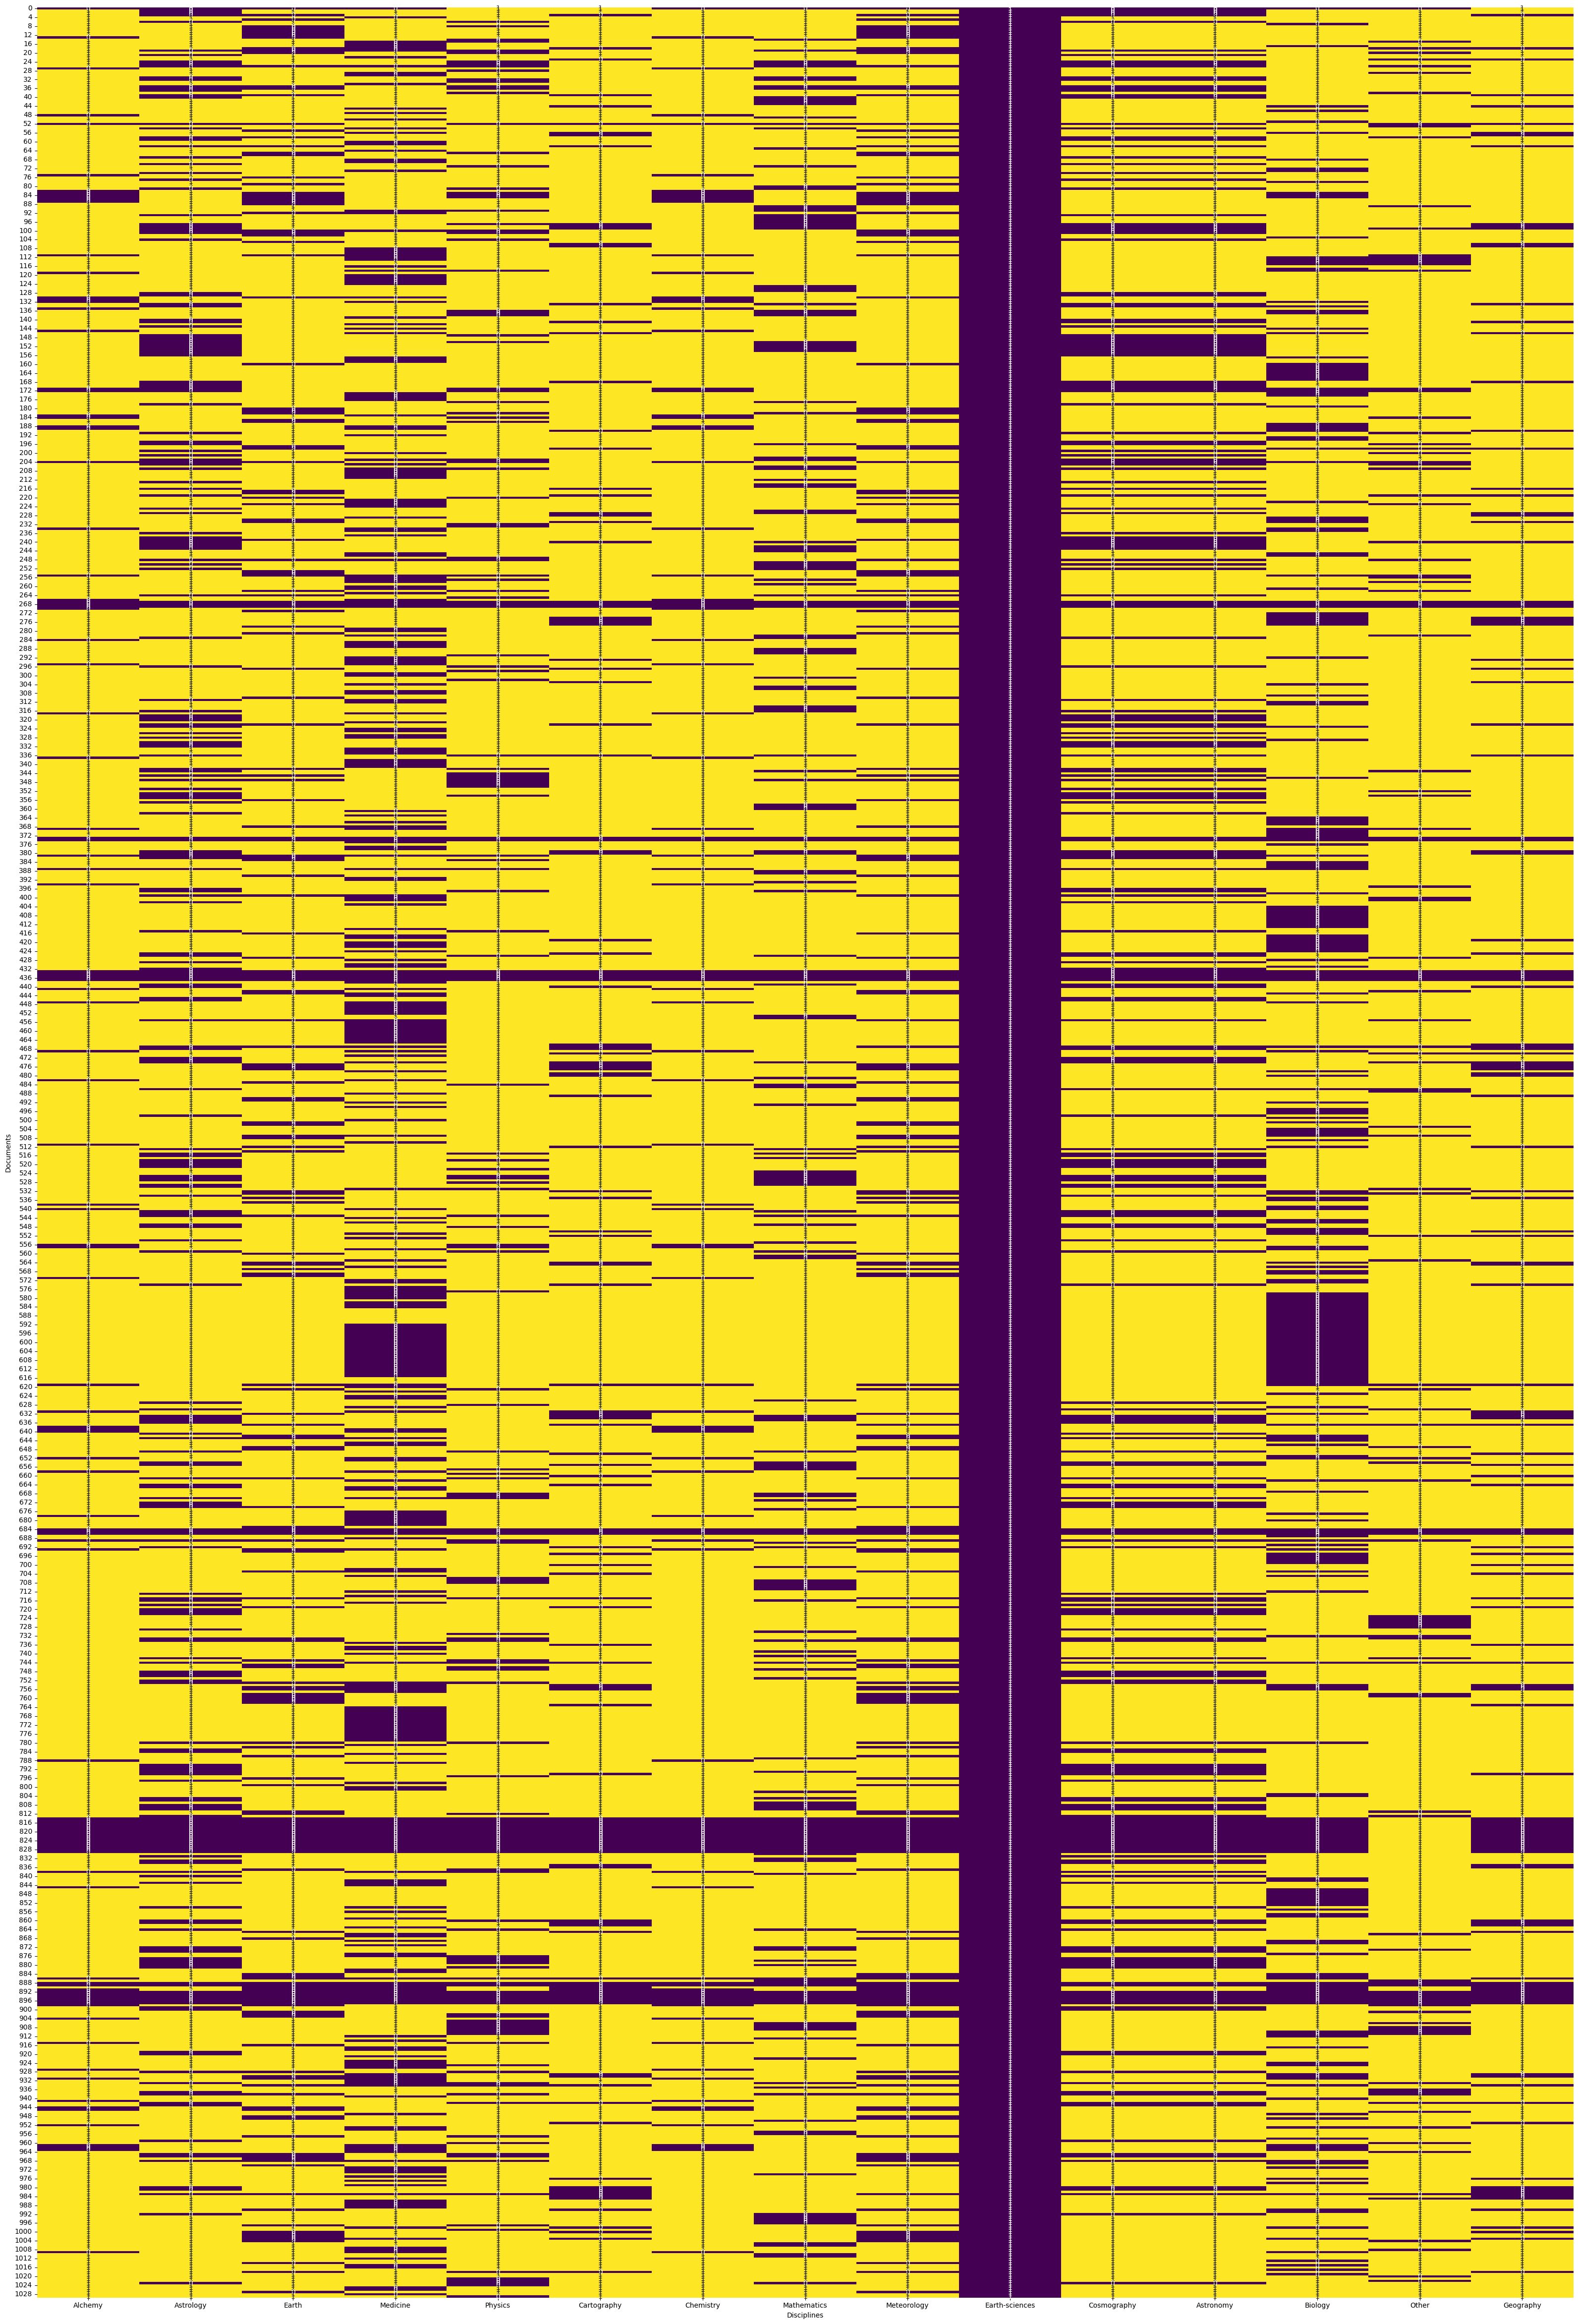

In [20]:
s = ['Alchemy', 'Astrology', 'Earth', 'Medicine', 'Physics', 'Cartography', 'Chemistry', 'Mathematics', 'Meteorology', 'Earth-sciences', 'Cosmography', 'Astronomy', 'Biology', 'Other', 'Geography']

disc = res_df[s].values

# Sample multi-row categorical data
data = disc

# Convert to DataFrame
df = pd.DataFrame(data, columns=s)

# Convert categories to numeric codes
df_numeric = df.apply(lambda col: pd.Categorical(col).codes)

# Plot as a heatmap
plt.figure(figsize=(40, 60))
sns.heatmap(df_numeric, annot=df.values, fmt='', cmap='viridis', cbar=False)
#plt.title('Categorical Matrix Heatmap')
plt.xlabel('Disciplines')
plt.ylabel('Documents')
plt.show()
